In [1]:
import Pkg

Pkg.activate(".")

  Activating project at `~/com.github/lucifer1004/poisson-sampling-julia`


In [2]:
using BenchmarkTools, Plots, StatsPlots

In [3]:
include("poisson_2d.jl")

sample_2d (generic function with 2 methods)

In [4]:
include("poisson_nd.jl")

sample_nd (generic function with 2 methods)

In [5]:
testcases = [1000, 5000, 10000, 50000]

4-element Vector{Int64}:
  1000
  5000
 10000
 50000

In [6]:
bench2d = map(testcases) do n_samples
    b = @benchmarkable sample_2d((400, 400), $n_samples)
    result = run(b)
    sum(result.times) / length(result.times) / 1e6
end

4-element Vector{Float64}:
   4.177440794627383
  22.35815391928251
  45.58708535454545
 239.84094214285713

In [7]:
benchnd = map(testcases) do n_samples
    b = @benchmarkable sample_nd((400, 400), $n_samples)
    result = run(b)
    sum(result.times) / length(result.times) / 1e6
end

4-element Vector{Float64}:
   4.927844424274974
  26.93737896236559
  54.557456978260866
 280.1220803333333

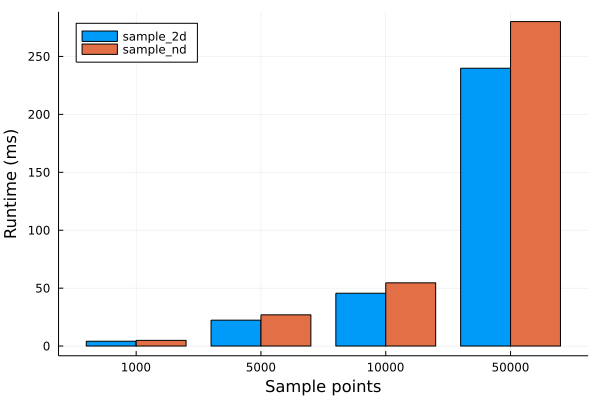

In [8]:
groupedbar([bench2d  benchnd], 
    bar_position = :dodge, 
    label = ["sample_2d" "sample_nd"], 
    xticks = (1:4, ["1000" "5000" "10000" "50000"]),
    legend = :topleft,
)
ylabel!("Runtime (ms)")
xlabel!("Sample points")

In [9]:
benchnd3d = map(testcases) do n_samples
    b = @benchmarkable sample_nd((400, 400, 400), $n_samples)
    result = run(b)
    sum(result.times) / length(result.times) / 1e6
end

4-element Vector{Float64}:
 192.29968544
 233.2377395909091
 295.60644429411764
 823.8413642857142

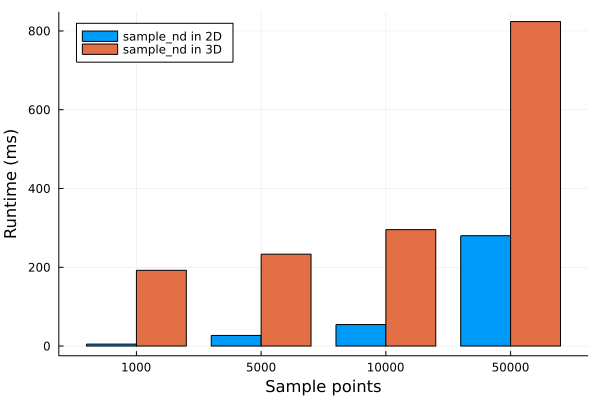

In [10]:
groupedbar([benchnd  benchnd3d], 
    bar_position = :dodge, 
    label = ["sample_nd in 2D" "sample_nd in 3D"], 
    xticks = (1:4, ["1000" "5000" "10000" "50000"]),
    legend = :topleft,
)
ylabel!("Runtime (ms)")
xlabel!("Sample points")